# 국민건강보험공단_건강검진정보_2021_12 분석
건강검진 결과지 제대로 읽는 법


https://health.chosun.com/site/data/html_dir/2016/11/30/2016113001291.html

## 국민건강보험공단_건강검진정보 다운로드하는 방법
1. http://data.go.kr 접속
2. 검색어 "국민건강보험공단" 검색
3. 검색결과 3번째쯤 제목이 "국민건강보험공단_건강검진정보" 클릭
4. 우측 "다운로드" 클릭 하여 데이터파일 다운로드한다
5. 하단 "주기성과거데이터" 우측 "더보기" 클릭
6. 3번째 "...사용자매뉴얼" 클릭
7. "다운로드" 클릭. 사용자메뉴얼은 한글파일이라서 한글뷰어 설치가 필요하다. 
8. 데이터파일내 코드들은 사용자매뉴얼내 설명을 참고하여 이용한다.

## 프로젝트 목표
1. 건강검진정보를 보고 최대한 다양한 방법으로 통계를 내어 시각화를 한다. 즉 EDA를 하시오.
2. 검진정보와 검진결과지를 제대로 읽는법을 참고하여 개인별 건강상태정보를 요약하시오. 특히 BMI수치에 대한 해석은 성별, 연령별로 다르게 적용해야한다는 주장과 자료가 있으니 확인바랍니다. 
3. 예를 들어 비만도 칼럼을 만들어 비만정도를 기록, 혈압칼럼만들어 저혈압,.. 을 기록한다. 건강상태별로 통계내고 시각화하고 건강상태를 요양한 칼럼을 작성한다. 그외 미디어를 통해 건강관련 통계와 직접 계산한 통계를 비교한 내용을 작성할 수 있다.
3. 작성된 개인별 요약상태를 이용한 통계를 시각화할 수 있다.( 예를들어 비만도가 중증인 사람들중 xx%는 흡연중이다. 등등 )
4. 팀별로 모여 목표와 해야하는 내용에 대해 의견을 나눈다.
5. 프로젝트는 개인별로 작성하여 매너모스트에서 DM으로 제출하세요
6. 제출기한은 내일(4월 8일 13시)
7. 제출자중 팀별로 1명씩 제출한 내용에 대해 발표한다.

### 아래는 건강검진정보를 분리,저장한 경우를 예로 들었다. 각자 다운로드 받아 사용하세요.
### 직접내려받으면 읽는 속도가 빠름

###### 각 수치별 영향

- 요단백 : 신장기능
- 혈색소 : 수치高 : 혈당과다 / 수치低 : 빈혈,관절염,백혈병
- 혈당 : 당뇨병
- HDL, LDL, 혈청크레아티닌 : 신장이상
- AST, ALT : 간염
- 감마지티피(GGT) : 알콜성 간기능 장애

###### 증상 별 연관 수치

- 당뇨 : 혈당-혈색소
- 신장기능이상 : 요단백-HDL&LDL
- 간기능 : 총 콜레스테롤-감마지티피(GGT)-트리글리세라이드

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

data = pd.read_csv('./국민건강보험공단_건강검진정보_20211229.CSV',
                  encoding='euc-kr')
data

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


#### 결측치 처리

In [46]:
# 혈청크레아티닌 - 요단백

df1 = data.copy()
x = df1.loc[:,'혈청크레아티닌'].mean()
df1['혈청크레아티닌'] = df1['혈청크레아티닌'].fillna(round(x,1))
mancond = df1['성별코드']==1
womancond = df1['성별코드']==2
manhss = df1.loc[mancond,'혈색소'].mean()
womanhss = df1.loc[womancond,'혈색소'].mean()

df1.loc[mancond,'혈색소'] = df1.loc[mancond,'혈색소'].fillna(round(manhss,1))
df1.loc[womancond,'혈색소'] = df1.loc[womancond,'혈색소'].fillna(round(womanhss,1))

# BMI 지수 추가
df1['BMI'] =round( (df1['체중(5Kg 단위)']/(df1['신장(5Cm단위)']/100)**2),1)

# 식전 혈당 결측치 채우기
manhd = df1.loc[mancond,'식전혈당(공복혈당)'].mean()
womanhd = df1.loc[womancond,'식전혈당(공복혈당)'].mean()
df1.loc[mancond,'식전혈당(공복혈당)'] = df1.loc[mancond,'식전혈당(공복혈당)'].fillna(round(manhd))
df1.loc[womancond,'식전혈당(공복혈당)'] = df1.loc[womancond,'식전혈당(공복혈당)'].fillna(round(womanhd))

# 수축기 혈압 결측치 채우기
manho1 = df1.loc[mancond,'수축기 혈압'].mean()
womanho1 = df1.loc[womancond,'수축기 혈압'].mean()

df1.loc[mancond,'수축기 혈압'] = df1.loc[mancond,'수축기 혈압'].fillna(round(manho1))
df1.loc[womancond,'수축기 혈압'] = df1.loc[womancond,'수축기 혈압'].fillna(round(womanho1))


# 이완기 혈압 결측치 채우기
manho2 = df1.loc[mancond,'이완기 혈압'].mean()
womanho2 = df1.loc[womancond,'이완기 혈압'].mean()

df1.loc[mancond,'이완기 혈압'] = df1.loc[mancond,'이완기 혈압'].fillna(round(manho2))
df1.loc[womancond,'이완기 혈압'] = df1.loc[womancond,'이완기 혈압'].fillna(round(womanho2))

# AST&ALT 처리

df1['(혈청지오티)AST'] = df1['(혈청지오티)AST'].fillna(round(df1['(혈청지오티)AST'].mean()))
df1['(혈청지오티)ALT'] = df1['(혈청지오티)ALT'].fillna(round(df1['(혈청지오티)ALT'].mean()))

# 감마지티피 처리
df1.loc[mancond,'감마 지티피'] = df1.loc[mancond,'감마 지티피'].fillna(round(df1.loc[mancond,'감마 지티피'].mean()))
df1.loc[womancond,'감마 지티피'] = df1.loc[womancond,'감마 지티피'].fillna(round(df1.loc[womancond,'감마 지티피'].mean()))

# 허리둘레 처리
df1.loc[mancond,'허리둘레'] = df1.loc[mancond,'허리둘레'].fillna(round(df1.loc[mancond,'허리둘레'].mean()))
df1.loc[womancond,'허리둘레'] = df1.loc[womancond,'허리둘레'].fillna(round(df1.loc[womancond,'허리둘레'].mean()))

# BMI 기준 세우기 (성별,연령대별 구분 필요.)




# 결측치 채우기
# 식전혈당(공복혈당)/혈색소//AST/ALT/혈청크레아티닌/감마지티피/수축기 혈압/이완기 혈압


###### 결측치 처리 확인

In [47]:
df1.isnull().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레                 0
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압               0
이완기 혈압               0
식전혈당(공복혈당)           0
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소                  0
요단백              12141
혈청크레아티닌              0
(혈청지오티)AST           0
(혈청지오티)ALT           0
감마 지티피               0
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
BMI                  0
dtype: int64

##### 데이터 범주화

In [48]:
# 식전혈당

def transsjhd (x) :
    if x<70 : return '저혈당'
    if x>100 : return '고혈당'
    return '정상'


# 혈색소
def transhssM (x) :
    if x<13 : return '낮음'
    if x>16.6 : return '높음'
    return '정상'

def transhssW (x) :
    if x<12 : return '낮음'
    if x>15.5 : return '높음'
    return '정상'


# 혈청크레아티닌
def transh(x) :
    if x<0.8 : return '낮음'
    if x>1.7 : return '높음'
    return '정상'

#혈청 AST&ALT
def transASTALT(x) :
    if x>40 : return '비정상'
    return '정상'

# 성별 코드 변환
def sextrans(x) :
    if x==1 : return '남성'
    return '여성'

# 음주여부 변환
def transal(x) :
    if x==1 : return '음주자'
    return '비음주자'

# 연령대 합치기
def age(x) :
    return ((x*5-1)//10)*10

# 지역재정의
house = {11:'서울특별시',26:'부산광역시',27:'대구광역시',28:'인천광역시',29:'광주광역시',
        30:'대전광역시',31:'울산광역시',36:'세종특별자치시',41:'경기도',42:'강원도',
        43:'충청북도',44:'충청남도',45:'전라북도',46:'전라남도',47:'경상북도',48:'경상남도',
        49:'제주특별자치도'}

def transhouse(x) :
    return house[x]

df1['거주지'] =  df1['시도코드'].apply(transhouse)

df1['연령대'] = df1['연령대 코드(5세단위)'].apply(age)

df1.loc[mancond,'음주여부'] = df1.loc[mancond,'음주여부'].apply(transal)
df1.loc[womancond,'음주여부'] = df1.loc[womancond,'음주여부'].apply(transal)


df1['성별코드'] = df1['성별코드'].apply(sextrans)

df1['혈청크레아티닌구분'] = df1['혈청크레아티닌'].apply(transh)

df1['식전혈당범주'] = df1['식전혈당(공복혈당)'].apply(transsjhd)

df1.loc[mancond,'혈색소범주'] = df1.loc[mancond,'혈색소'].apply(transhssM)
df1.loc[womancond,'혈색소범주'] = df1.loc[womancond,'혈색소'].apply(transhssW)

df1.loc[mancond,'AST범주'] = df1.loc[mancond,'(혈청지오티)AST'].apply(transASTALT)
df1.loc[womancond,'AST범주'] = df1.loc[womancond,'(혈청지오티)AST'].apply(transASTALT)

df1.loc[mancond,'ALT범주'] = df1.loc[mancond,'(혈청지오티)ALT'].apply(transASTALT)
df1.loc[womancond,'ALT범주'] = df1.loc[womancond,'(혈청지오티)ALT'].apply(transASTALT)
df1

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,치석,데이터 공개일자,BMI,거주지,연령대,혈청크레아티닌구분,식전혈당범주,혈색소범주,AST범주,ALT범주
0,2020,1,36,남성,9,165,60,72.1,1.2,1.5,...,NaN,2021-12-29,22.0,세종특별자치시,40,정상,정상,정상,정상,정상
1,2020,2,27,여성,13,150,65,81.0,0.8,0.8,...,NaN,2021-12-29,28.9,대구광역시,60,낮음,정상,정상,정상,정상
2,2020,3,11,여성,12,155,55,70.0,0.6,0.7,...,NaN,2021-12-29,22.9,서울특별시,50,낮음,고혈당,정상,정상,정상
3,2020,4,31,남성,13,160,70,90.8,1.0,1.0,...,0.0,2021-12-29,27.3,울산광역시,60,정상,고혈당,정상,비정상,비정상
4,2020,5,41,여성,12,155,50,75.2,1.5,1.2,...,NaN,2021-12-29,20.8,경기도,50,낮음,고혈당,정상,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,여성,13,145,55,81.0,0.9,1.0,...,NaN,2021-12-29,26.2,경기도,60,낮음,고혈당,정상,정상,정상
999996,2020,999997,26,여성,12,160,55,76.5,1.5,1.5,...,NaN,2021-12-29,21.5,부산광역시,50,정상,정상,정상,정상,정상
999997,2020,999998,48,남성,9,175,70,85.0,1.2,1.2,...,NaN,2021-12-29,22.9,경상남도,40,정상,정상,정상,정상,정상
999998,2020,999999,48,여성,9,160,70,91.0,0.6,0.5,...,NaN,2021-12-29,27.3,경상남도,40,정상,고혈당,낮음,정상,정상


##### 데이터 정보 확인

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 39 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  object 
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          1000000 non-null  float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        1000000 non-null  float64
 13  이완기 혈압        1000000 non-null  float64
 14  식전혈당(공복혈당)    1000000 non-null  float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

- 요단백 : 요단백의 경우 수치가 아닌 ‘음성’과 ‘양성’으로 표기된다. 양성의 경우 소변 속에 단백질 검출 반응이 일어났다는 뜻으로, 마찬가지로 신장 기능이 좋지 않다는 것을 의미한다.
- 1 : 음성, 2 : 미량 검출, 신장기능관리 필요., 3 : 양성, 소변 중 단백뇨의 양이 30mg/dL, 4 : 양성, 100mg/dL, 5 : 양성, 300mg/dL, 6 : 양성, 1000mg/dL

- 혈청크레아틴 낮음 -> 당뇨, 간기능 이상 혈청 크레아티닌 (높음,정상,낮음)

In [50]:
# 요단백-혈청크레아티닌 관계
df1.pivot_table(index='요단백',values='혈청크레아티닌')

,혈청크레아티닌
요단백,
1.0,0.840440
2.0,0.861442
3.0,0.963924
4.0,1.238721
5.0,1.529136
6.0,1.799751


Text(0.5, 1.0, '요단백 그룹 별 혈청크레아티닌')

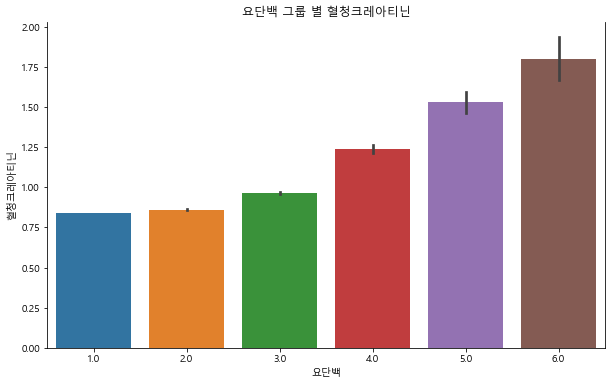

In [51]:
sns.barplot(x='요단백',y='혈청크레아티닌',data=df1).set_title('요단백 그룹 별 혈청크레아티닌')

In [52]:
df2 = df1.pivot_table(index=['성별코드','음주여부'],values='감마 지티피',aggfunc=['count','mean'])
df2['음주율'] = (df2.loc[:,'count']/1000000)*100
df2

count       mean      음주율
           감마 지티피     감마 지티피         
성별코드 음주여부                            
남성   비음주자  131922  34.429278  13.1922
     음주자   378767  55.046266  37.8767
여성   비음주자  283393  24.189250  28.3393
     음주자   205918  26.723555  20.5918

In [53]:
df1.pivot_table(index='연령대',values='총 콜레스테롤',aggfunc=['mean','min','max'])

,mean,min,max
,총 콜레스테롤,총 콜레스테롤,총 콜레스테롤
연령대,,,
40,203.878320,67.0,2416.0
50,206.443246,54.0,2193.0
60,194.652745,61.0,2016.0
70,181.614212,63.0,2403.0
80,177.047905,54.0,2377.0


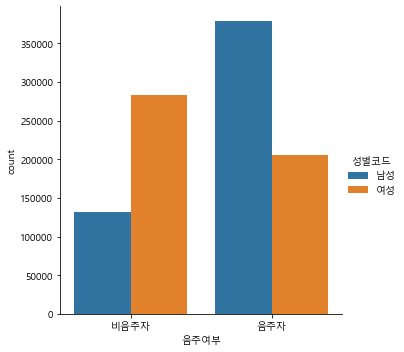

In [54]:
# sns.lineplot(x='연령대',y='count',hue='음주여부')
sns.catplot(x="음주여부",
            hue="성별코드",
            data=df1, 
            kind="count")

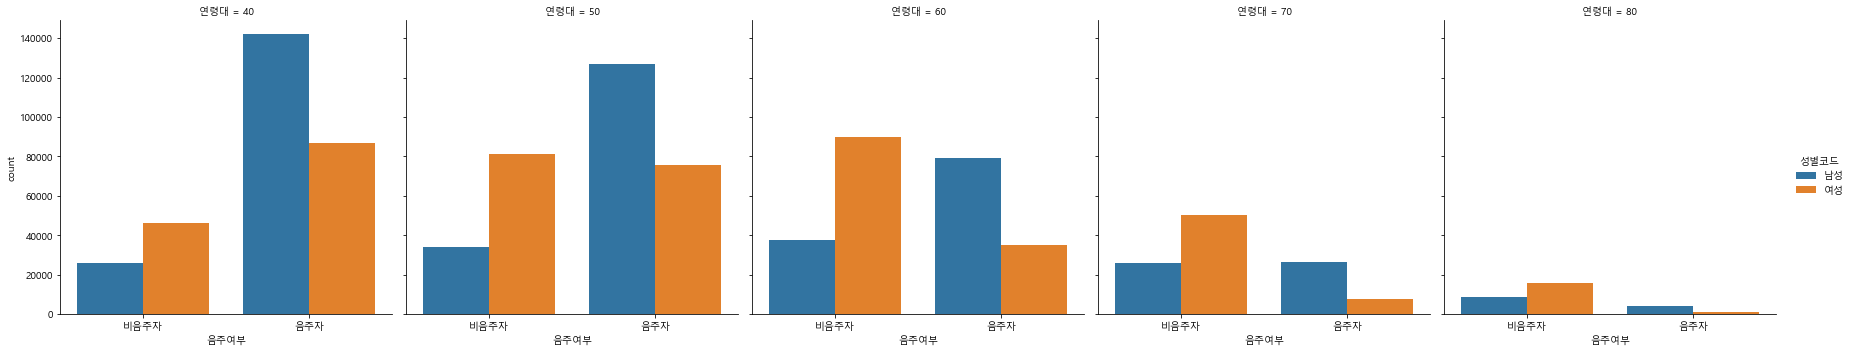

In [55]:
sns.catplot(x="음주여부",
            hue="성별코드", 
            col="연령대",
            data=df1, 
            kind="count")
plt.show()


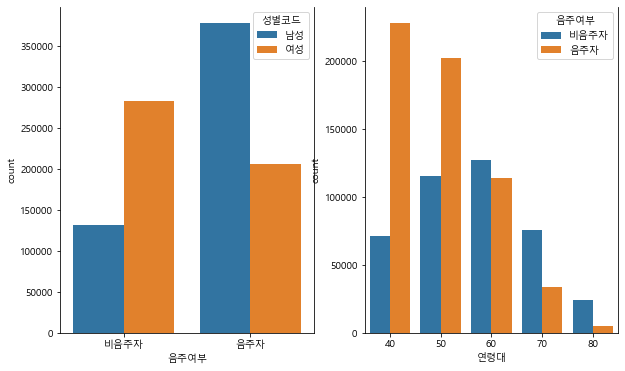

In [56]:
plt.subplot(1,2,1)
sns.countplot(data=df1,x='음주여부',hue='성별코드')
plt.subplot(1,2,2)

sns.countplot(data=df1,x='연령대',hue='음주여부')

plt.show()

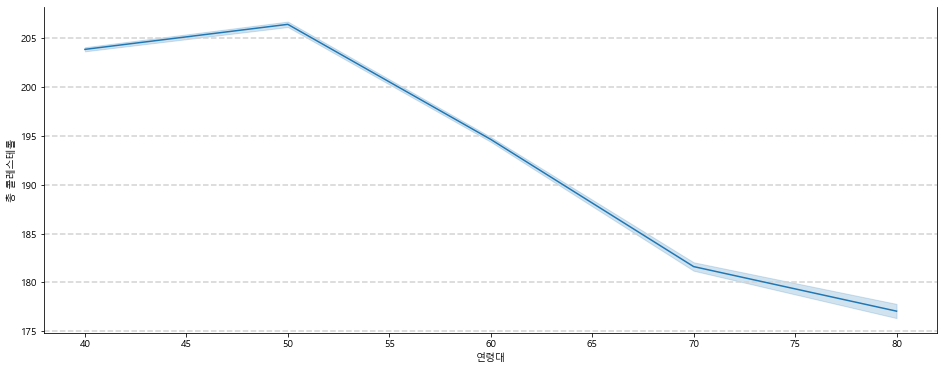

In [57]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df1,x='연령대',y='총 콜레스테롤')
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)


<AxesSubplot:xlabel='연령대', ylabel='총 콜레스테롤'>

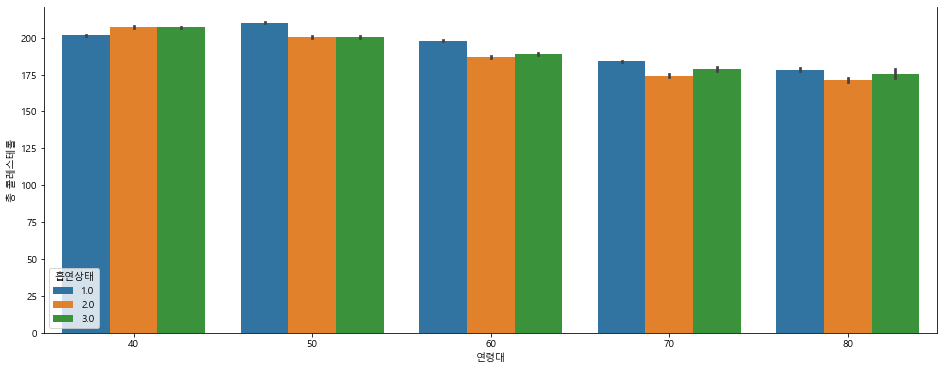

In [58]:
plt.figure(figsize=(16,6))
sns.barplot(data=df1,x='연령대',y='총 콜레스테롤',hue='흡연상태')

(170.0, 220.0)

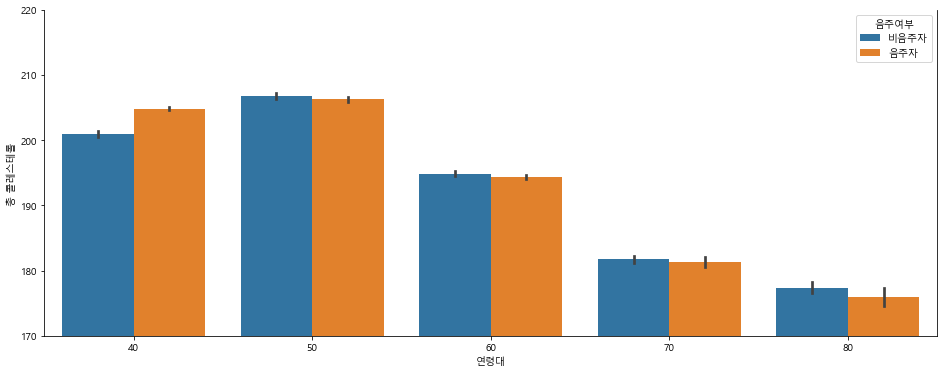

In [59]:
plt.figure(figsize=(16,6))
sns.barplot(data=df1,x='연령대',y='총 콜레스테롤',hue='음주여부')
plt.ylim(170,220)

- 보통 높은 중성지방 수치는 높은 콜레스테롤 수치와 동반되기 때문에 중성지방을 낮추기 위해서는 콜레스테롤을 낮추는 방법과 같이 식이요법, 운동 등 올바른 생활습관을 유지해야 합니다. 

- 혈중 트리글리세라이드가 증가하는 것은 운동, 과체중과 같은 신체 컨디션 차이에 연관이 있을 수 있음.

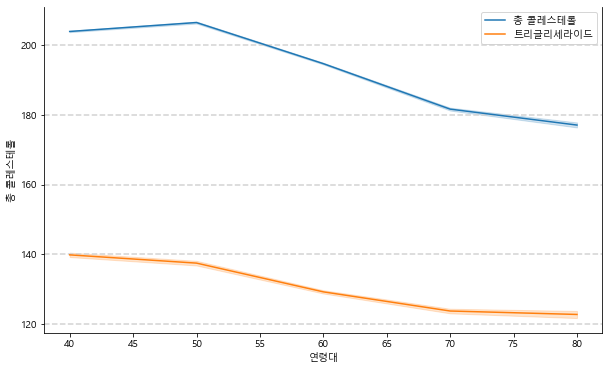

In [60]:
# 체내 콜레스테롤 수치와 트리글리세라이드 간 상관관계    
sns.lineplot(x='연령대',y='총 콜레스테롤',label='총 콜레스테롤',data=df1)
sns.lineplot(x='연령대',y='트리글리세라이드',label='트리글리세라이드',data=df1)
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)

plt.show()

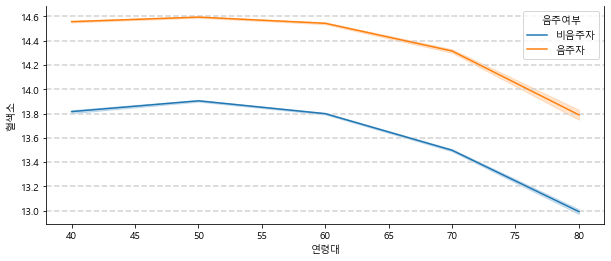

In [61]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df1,x='연령대',y='혈색소',hue='음주여부')
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)


- 결과 분석 : 전 연령대에서 음주자의 혈색소가 비 음주자의 혈색소보다 높게 나타나므로 음주여부와 혈색소 간의 유의미한 관계가 있다.라고 해석

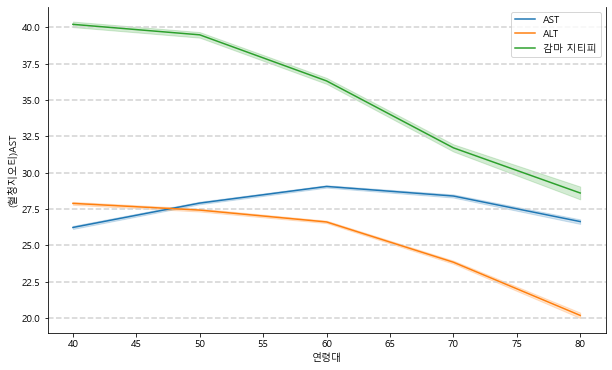

In [62]:
# AST,ALT,감마 지티피 => 애매함.
sns.lineplot(x='연령대',y='(혈청지오티)AST',label='AST',data=df1)
sns.lineplot(x='연령대',y='(혈청지오티)ALT',label='ALT',data=df1)
sns.lineplot(x='연령대',y='감마 지티피',label='감마 지티피',data=df1)

plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)

plt.show()

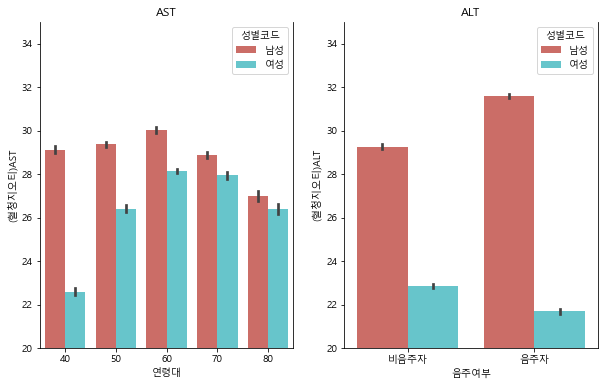

In [63]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)

sns.barplot(data = df1,
            x = '연령대', 
            y = '(혈청지오티)AST',
            hue='성별코드',
            palette = 'hls').set_title('AST')
plt.ylim(20,35)
plt.subplot(1,2,2)

sns.barplot(data = df1,
            x = '음주여부', 
            y = '(혈청지오티)ALT',
            hue='성별코드',
            palette = 'hls').set_title('ALT')
plt.ylim(20,35)
plt.show()
# 세대, 성별간 음주자,비음주자 구분필요.

<AxesSubplot:xlabel='연령대', ylabel='count'>

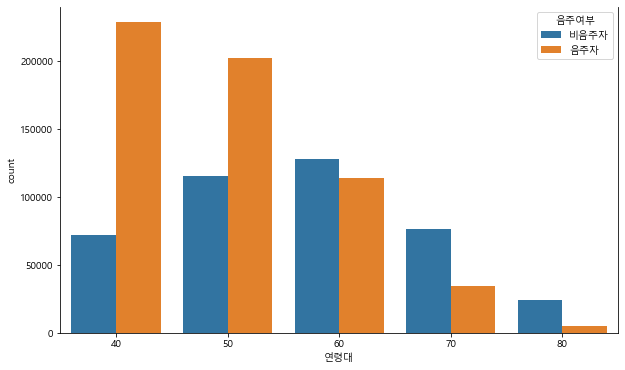

In [64]:
sns.countplot(data=df1,x='연령대',hue='음주여부')

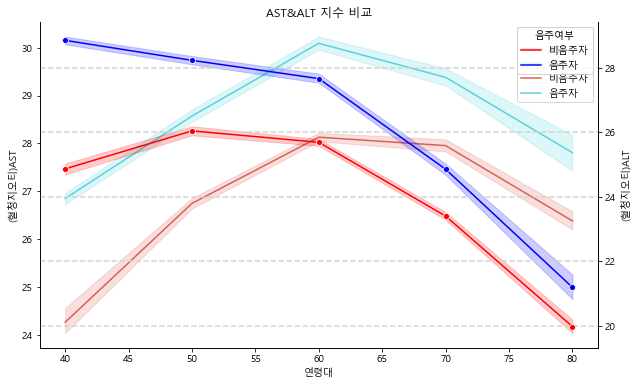

In [65]:
# AST,ALT,감마 지티피

plt.rcParams['axes.spines.top'] = False # 위쪽 축 제거

# plt.figure(figsize = (10,6))

fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(ax=ax, data=df1, x='연령대', y='(혈청지오티)AST', hue='음주여부',label='AST',palette='hls')
sns.lineplot(ax=ax2, data=df1, x='연령대', y='(혈청지오티)ALT', hue='음주여부',palette=['red','blue'],marker = 'o')

plt.title('AST&ALT 지수 비교')
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.show()


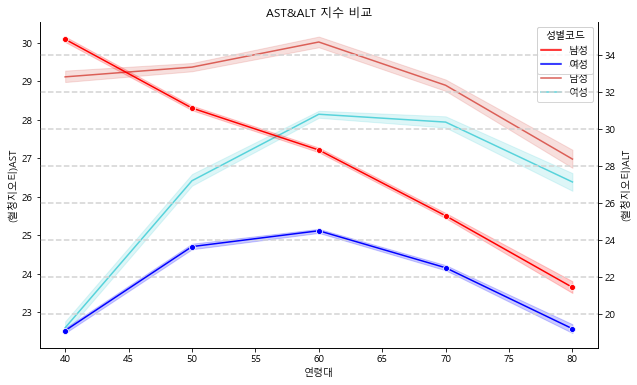

In [66]:
# AST,ALT,감마 지티피

plt.rcParams['axes.spines.top'] = False # 위쪽 축 제거

# plt.figure(figsize = (10,6))

fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(ax=ax, data=df1, x='연령대', y='(혈청지오티)AST', hue='성별코드',label='AST',palette='hls')
sns.lineplot(ax=ax2, data=df1, x='연령대', y='(혈청지오티)ALT', hue='성별코드',palette=['red','blue'],marker = 'o')

plt.title('AST&ALT 지수 비교')
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.show()


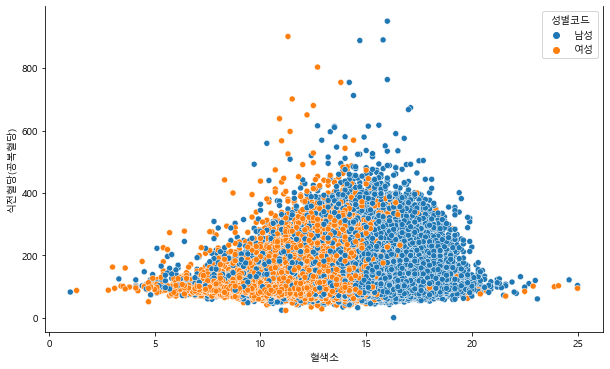

In [67]:
# 성별에 따른 혈색소와 식전혈당 관계
sns.scatterplot(x='혈색소',
               y='식전혈당(공복혈당)',hue='성별코드',data=df1)
plt.show()

- 총 콜레스테롤 수치는 심혈관 질환의 위험도를 예측하고 콜레스테롤 수치를 조절 중인 사람의 추적검사로 사용됨.

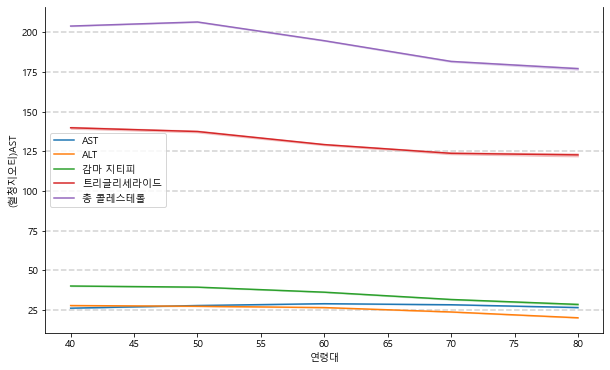

In [68]:
sns.lineplot(x='연령대',y='(혈청지오티)AST',label='AST',data=df1)
sns.lineplot(x='연령대',y='(혈청지오티)ALT',label='ALT',data=df1)
sns.lineplot(x='연령대',y='감마 지티피',label='감마 지티피',data=df1)
sns.lineplot(x='연령대',y='트리글리세라이드',label='트리글리세라이드',data=df1)
sns.lineplot(x='연령대',y='총 콜레스테롤',label='총 콜레스테롤',data=df1)
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)

plt.show()

In [10]:
# 성별,나이와 요단백 관계

def percent(x) :
    return ((x.count()/1000000)*100)
# df1.pivot_table(index='요단백',values='연령대',aggfunc='count')
df1.groupby('요단백')[['연령대']].agg(percent)

,연령대
요단백,
1.0,91.4825
2.0,3.9974
3.0,2.2219
4.0,0.7652
5.0,0.2465
6.0,0.0724


In [11]:
# 혈색소 수치 - 식전혈당
df1.pivot_table(index='혈색소범주',values='식전혈당(공복혈당)')

,식전혈당(공복혈당)
혈색소범주,
낮음,102.779492
높음,112.789528
정상,103.833991


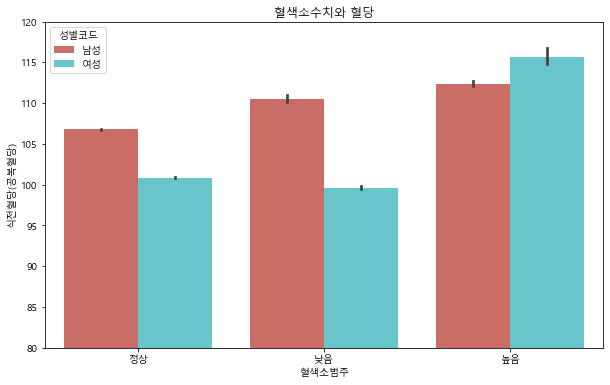

In [20]:
# 혈색소 수치에 따른 식전혈당 상관관계
ax = sns.barplot(data = df1,
            x = '혈색소범주', 
            y = '식전혈당(공복혈당)',
            hue='성별코드',
            palette = 'hls').set_title('혈색소수치와 혈당')
plt.ylim(80,120)
# for rect in ax:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
plt.show()

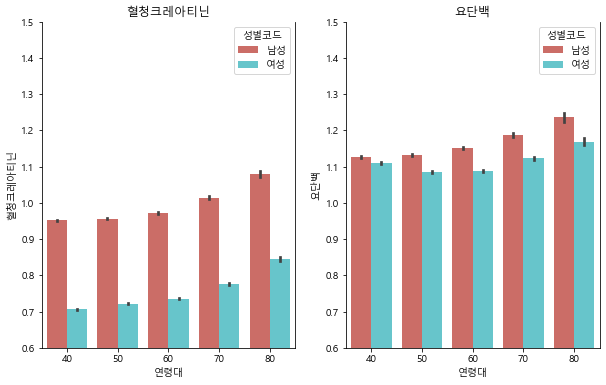

In [33]:
# 성별,나이에 따른 요단백과 혈청크레아티닌 사이의 관계

plt.figure(figsize = (10,6))

plt.subplot(1,2,1)

sns.barplot(data = df1,
            x = '연령대', 
            y = '혈청크레아티닌',
            hue='성별코드',
            palette = 'hls').set_title('혈청크레아티닌')
plt.ylim(0.6,1.5)

plt.subplot(1,2,2)

sns.barplot(data = df1,
            x = '연령대', 
            y = '요단백',
            hue='성별코드',
            palette = 'hls').set_title('요단백')
plt.ylim(0.6,1.5)


plt.show()

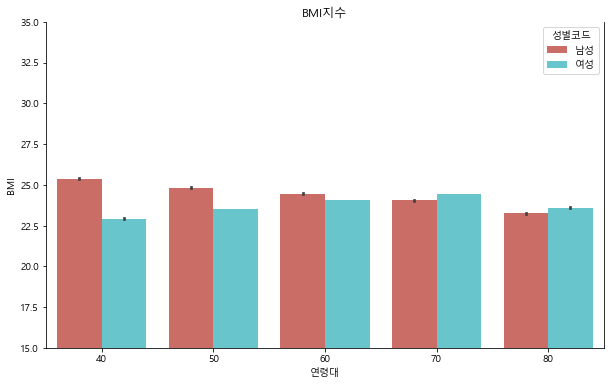

In [34]:
# BMI 지수 - 성별, 연령
plt.figure(figsize = (10,6))

sns.barplot(data = df1,
            x = '연령대', 
            y = 'BMI',
            hue='성별코드',
            palette = 'hls').set_title('BMI지수')
plt.ylim(15,35)

plt.show()